In [68]:
using CSV, Tables
using DelimitedFiles, DataFrames
using Statistics
import PyPlot as plt
using Plots
using GLM
using ShiftedArrays
using PyCall
using PlotlyJS
using FinancialToolbox
using FinancialDerivatives
using RCall
using LsqFit
using BusinessDays, Dates
using LaTeXStrings
using Random, Distributions
using StatsBase
using PrettyTables

using DifferentialEquations
using FinancialMonteCarlo
using FinancialDerivatives
using NumericalIntegration

yf = pyimport("yfinance")

PyObject <module 'yfinance' from 'C:\\Users\\aidin\\.julia\\conda\\3\\lib\\site-packages\\yfinance\\__init__.py'>

### Geometric Brownian Motion paths

In [69]:
function brownian_motion(N, T, h)
    """
    Simulates a Brownian motion
    :param int N : the number of discrete steps
    :param int T: the number of continuous time steps
    :param float h: the variance of the increments
    """
    dt = 1. * T/N  # the normalizing constant
    random_increments = rand(Normal(0.0, 1.0 * h), N)*sqrt(dt)  # the epsilon values
    brownian_motion = cumsum(random_increments)  # calculate the brownian motion
    brownian_motion = pushfirst!(brownian_motion, 0.) # insert the initial condition

    return brownian_motion, random_increments
end
    
function drifted_brownian_motion(mu, sigma, N, T, S0, seed=42)
    """Simulates a Brownian Motion with drift.
    
    :param float mu: drift coefficient
    :param float sigma: volatility coefficient
    :param int N : number of discrete steps
    :param int T: number of continuous time steps
    :param int seed: initial seed of the random generator
    :returns list: drifted Brownian motion
    """
    # set the seed
    Random.seed!(seed)
    # standard brownian motion
    W, _ = brownian_motion(N, T, 1.0)
    # the normalizing constant
    dt = 1. * T/N
    # generate the time steps
    time_steps = range(0,stop=N*dt,length=N+1)
    # calculate the Brownian Motion with drift
    X = mu * time_steps + sigma * W .+ S0
    return X
end

drifted_brownian_motion (generic function with 2 methods)

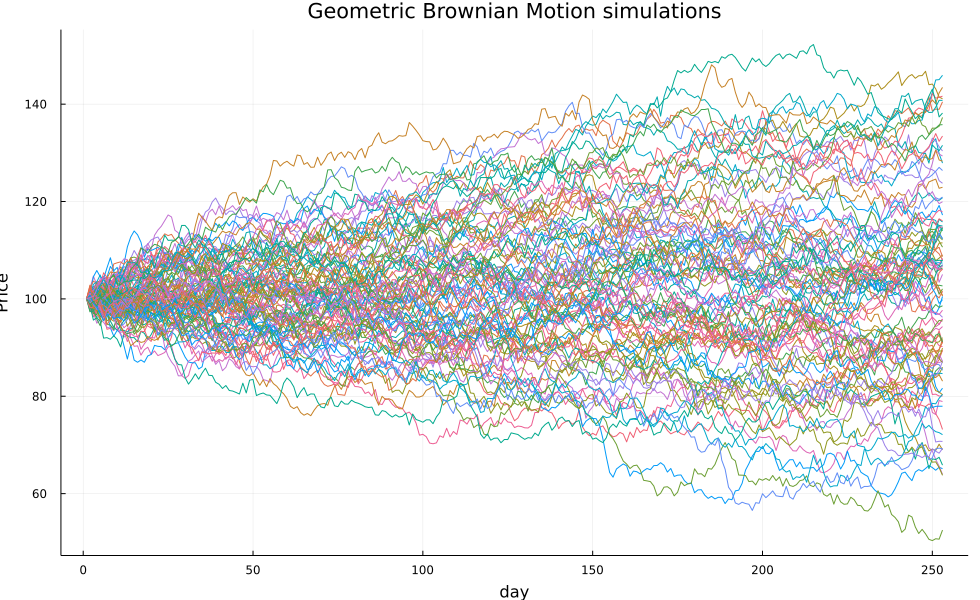

In [70]:
# Fixed parameters

S0    = 100
sigma = 20
r     = .01
T     = 1
N     = 252
K     = 99
#dt    = 1/252
paths = 100

S = Array{Float64}( undef, paths, N+1 )

Plots.plot()
for i=1:paths
    S[i,:] = drifted_brownian_motion(r, sigma, N, T, S0, i)
    Plots.plot!(S[i,:])
end
Plots.plot!(title="Geometric Brownian Motion simulations",
            xlab="day", ylab="Price", legend=false,
            size=(980,600))

In [71]:
function GBM(S0, σ, r, T, N, I)
    dt = T/N
    a = (r - 0.5*σ^2)*dt
    b = σ*√dt

    S = zeros(Float64, N, I)

    for i in 1:I
        S[1, i] = st = S0
        for j in 2:N
            st *= exp(a + b*randn())
            S[j, i] = st
        end
    end
    return S
end

GBM (generic function with 1 method)

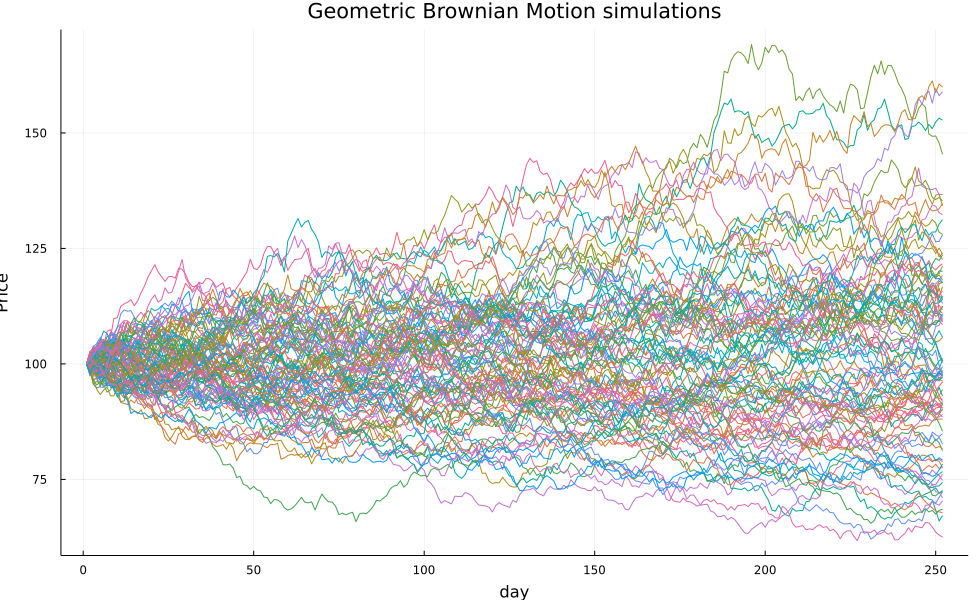

In [72]:
# Fixed parameters

S0    = 100
sigma = .20
r     = .01
T     = 1
N     = 252
K     = 99
#dt    = 1/252
paths = 100

S=transpose(GBM(S0, sigma, r, T, N, paths)) # Warm up JIT
Plots.plot()
for i=1:100
    Plots.plot!(S[i,:])
end
Plots.plot!(title="Geometric Brownian Motion simulations",
            xlab="day", ylab="Price", legend=false,
            size=(980,600))

In [73]:
VecPlot = Array{GenericTrace{Dict{Symbol, Any}}}( undef, paths )
for i=1:paths
    VecPlot[i]=PlotlyJS.scatter(;x=1:N, y=S[i,:])
end
layout=Layout(title="Geometric Brownian Motion simulations",
              yaxis_title="Price [USD]", xaxis_title="day",
              showlegend=false,width=1000, height=600,)
GBM_Plot=PlotlyJS.plot(VecPlot, layout)
#PlotlyJS.savefig(GBM_Plot, "figures/Paths.pdf", width=950, height=450)

data: [
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, and y",
  "scatter with fields type, x, 

### Option pricing

In [87]:
paths = 100000

S=transpose(GBM(S0, sigma, r, T, N, paths)) # Warm up JIT

payoff_call = max.(S[:,N] .- K, 0)
payoff_put  = max.(K .- S[:,N], 0)

European_Call = mean(payoff_call)
European_Put  = mean(payoff_put )

println(  "European Call:\t\t", European_Call,
        "\nEuropean Put: \t\t", European_Put )

European Call:		8.956613681788248
European Put: 		6.986392957853803


In [93]:
println("Max:\t\t", maximum([S[i, N] for i=1:paths]),"\n",
        "Min:\t\t", minimum([S[i, N] for i=1:paths]),"\n",
        "MEAN:\t\t",   mean([S[i, N] for i=1:paths]),"\n",
        "STD:\t\t",     std([S[i, N] for i=1:paths]),"\n",
        "DISP:\t\t",(maximum([S[i, N] for i=1:paths])-minimum([S[i, N] for i=1:paths]))/2,"\n",)

STD_PATH = [std( [S[i, j] for i=1:paths]) for j=1:N]
MEA_PATH = [mean([S[i, j] for i=1:paths]) for j=1:N]
VAR_PATH = [var( [S[i, j] for i=1:paths]) for j=1:N]

STD_PLOT=PlotlyJS.scatter(;x=1:N, y=STD_PATH, name="Standard deviation", yaxis="y2",)
MEA_PLOT=PlotlyJS.scatter(;x=1:N, y=MEA_PATH, name="Mean")
#VAR_PLOT=PlotlyJS.scatter(;x=1:N, y=VAR_PATH, name="Variance")
layout=Layout(title="Geometric Brownian Motion mean and standard deviation",
              yaxis_title="Mean [USD]", xaxis_title="day",
              yaxis2=attr(title="Dispersion [USD]",overlaying="y",side="right"),
              width=1000, height=600,)
MEA_STD_Plot=PlotlyJS.plot([MEA_PLOT,STD_PLOT], layout)
#PlotlyJS.savefig(MEA_STD_Plot, "figures/MEAN_STD.pdf", width=850, height=450)

Max:		252.30151748011508
Min:		43.66769204369821
MEAN:		100.97022072393443
STD:		20.302226827830946
DISP:		104.31691271820844



data: [
  "scatter with fields name, type, x, and y",
  "scatter with fields name, type, x, y, and yaxis"
]

layout: "layout with fields height, margin, template, title, width, xaxis, yaxis, and yaxis2"

In [16]:
# here chart about convergence

paths = 1:10:10000

call_price = Array{Float64}( undef, length(paths) )
put_price  = Array{Float64}( undef, length(paths) )

for x=1:length(paths)
    S=transpose(GBM(S0, sigma, r, T, N, paths[x]))

    call_price[x] = mean(max.(S[:,N] .- K, 0))
    put_price[ x] = mean(max.(K .- S[:,N], 0))
end

CallPlot=PlotlyJS.scatter(;x=paths, y=call_price, name="Call option", line=attr(color="red",  width=3, dash="solid" ))
PutPlot =PlotlyJS.scatter(;x=paths, y= put_price, name= "Put option", line=attr(color="blue", width=3, dash="solid" ))
layout=Layout(title="Convergence of the Option price",
              yaxis_title="Option Price [USD]", xaxis_title="Paths generated",
              width=950, height=600,)
PricesPlot=PlotlyJS.plot([CallPlot, PutPlot], layout)
#PlotlyJS.savefig(PricesPlot, "figures/Vanilla_Multi.pdf", width=950, height=450)

"figures/Vanilla_Multi.pdf"

In [95]:
e=randn(paths)
S_OS=S0.*[exp((r-.5*sigma^2)*T + sigma*sqrt(T)*e[j]) for j=1:paths]

payoff_call_OS = max.(S_OS .- K, 0)
payoff_put_OS  = max.(K .- S_OS, 0)

European_Call_OS = mean(payoff_call_OS)
European_Put_OS  = mean(payoff_put_OS )

println(  "European Call:\t\t", European_Call_OS,
        "\nEuropean Put: \t\t", European_Put_OS )

European Call:		8.995718777546312
European Put: 		6.98510331617657


In [99]:
# here chart about convergence

paths = 1:10:10000

call_price = Array{Float64}( undef, length(paths) )
put_price  = Array{Float64}( undef, length(paths) )

for x=1:length(paths)
    S_OS=S0.*[exp((r-.5*sigma^2)*T + sigma*sqrt(T)*e[j]) for j=1:paths[x]]

    call_price[x] = mean(max.(S_OS .- K, 0))
    put_price[ x] = mean(max.(K .- S_OS, 0))
end

CallPlot=PlotlyJS.scatter(;x=paths, y=call_price, name="Call option", line=attr(color="red",  width=3, dash="solid" ))
PutPlot =PlotlyJS.scatter(;x=paths, y= put_price, name= "Put option", line=attr(color="blue", width=3, dash="solid" ))
layout=Layout(title="Convergence of the Option price - One step MonteCarlo",
              yaxis_title="Option Price [USD]", xaxis_title="Paths generated",
              width=950, height=600,)
PricesPlot=PlotlyJS.plot([CallPlot, PutPlot], layout)
#PlotlyJS.savefig(PricesPlot, "figures/Vanilla_OneStep.pdf", width=950, height=450)

data: [
  "scatter with fields line, name, type, x, and y",
  "scatter with fields line, name, type, x, and y"
]

layout: "layout with fields height, margin, template, title, width, xaxis, and yaxis"

In [30]:
@pyinclude("Leisen_Reimer.py")

sigma=.2
Call=FinancialDerivatives.EuropeanOption(Float64(S0), Float64(K), Float64(r), Float64(sigma), Float64(T), 1)
CRR_Call =evaluate(Call, CoxRossRubinstein())
LR_Call  =py"LeisenReimerBinomial"("P", "e", "C", S0, K, T, r, r, sigma, 1001)
BS_Call  =evaluate(Call, BlackScholes())

Put=FinancialDerivatives.EuropeanOption(Float64(S0), Float64(K), Float64(r), Float64(sigma), Float64(T), -1)
CRR_Put =evaluate(Put, CoxRossRubinstein())
LR_Put  =py"LeisenReimerBinomial"("P", "e", "P", S0, K, T, r, r, sigma, 1001)
BS_Put  =evaluate(Put, BlackScholes())

println("----CALL----\n",
        "Cox-Ross-Rubenstein:\t", CRR_Call,
        "\nLeisen-Reimer:\t\t",   LR_Call,
        "\nBlack-Scholes:\t\t",   BS_Call,
        "\n\n----PUT----\n",
        "Cox-Ross-Rubenstein:\t", CRR_Put,
        "\nLeisen-Reimer:\t\t",    LR_Put,
        "\nBlack-Scholes:\t\t",    BS_Put)

----CALL----
Cox-Ross-Rubenstein:	8.919095971855757
Leisen-Reimer:		8.918504030931105
Black-Scholes:		8.918504421014205

----PUT----
Cox-Ross-Rubenstein:	7.0027434904907775
Leisen-Reimer:		6.933437572112929
Black-Scholes:		6.933437962181841


In [35]:
N     = 252
paths = 100000

function Euler(S0, K, r, sigma, T, N, paths, Call_Put=1)
    dt = T/N;
    sum = 0;
    for i=1:paths
        S = S0;
        for j=1:N
            S+=r*S*dt + sigma*S*sqrt(dt)*randn();
        end
        if Call_Put==1
            sum += exp(-r*T)*max(S-K,0);
        elseif Call_Put==-1
            sum += exp(-r*T)*max(K-S,0);
        else
            throw(ValueError("type_ must be 'call' or 'put'"))
        end
    end
    return sum/paths
end

function Milstein(S0, K, r, sigma, T, N, paths, Call_Put=1)
    dt = T/N;
    sum = 0;
    for i=1:paths
        S = S0;
        for j=1:N
            Z=randn()
            S+= r*S*dt + sigma*S*sqrt(dt)*Z + 0.5*sigma^2*dt*(Z^2 - 1);
        end
        if Call_Put==1
            sum += exp(-r*T)*max(S-K,0);
        elseif Call_Put==-1
            sum += exp(-r*T)*max(K-S,0);
        else
            throw(ValueError("type_ must be 'call' or 'put'"))
        end
    end
    return sum/paths
end

Euler_Call    =    Euler(S0, K, r, sigma, T, N, paths,  1)
Euler_Put     =    Euler(S0, K, r, sigma, T, N, paths, -1)
Milstein_Call = Milstein(S0, K, r, sigma, T, N, paths,  1)
Milstein_Put  = Milstein(S0, K, r, sigma, T, N, paths, -1)

println("----CALL----\n",
        "Euler:\t\t",       Euler_Call,
        "\nMilstein:\t", Milstein_Call,
        "\n\n----PUT----\n",
        "Euler:\t\t",       Euler_Put,
        "\nMilstein:\t", Milstein_Put)

----CALL----
Euler:		8.945532798928836
Milstein:	8.92546586489309

----PUT----
Euler:		6.8755370888528216
Milstein:	6.909955595078402


In [66]:
#Define Spot Datas
S0=100.0;
K=99.0;
r=0.01;
T=1.0;
d=0.;
D=90.0;
U=130;
#Define FinancialMonteCarlo Parameters
Nsim=10000;
Nstep=252;
#Define Model Parameters
σ=0.2;
#Build the Structs
mcConfig=MonteCarloConfiguration(Nsim,Nstep);
rfCurve=ZeroRate(r);

#Define The Options
Fwd_payoff=Forward(T)
EU_payoff=FinancialMonteCarlo.EuropeanOption(T,K)
AM_payoff=FinancialMonteCarlo.AmericanOption(T,K)
Barrier_payoffDownOut=FinancialMonteCarlo.BarrierOptionDownOut(T,K,D)
Barrier_payoffUpOut=FinancialMonteCarlo.BarrierOptionUpOut(T,K,U)
Barrier_payoffDownIn=FinancialMonteCarlo.BarrierOptionDownIn(T,K,D)
Barrier_payoffUpIn=FinancialMonteCarlo.BarrierOptionUpIn(T,K,U)
Barrier_payoffDouble=FinancialMonteCarlo.DoubleBarrierOption(T,K,D,U)
AsianFloatingStrike_payoff=FinancialMonteCarlo.AsianFloatingStrikeOption(T)
AsianFixedStrike_payoff=FinancialMonteCarlo.AsianFixedStrikeOption(T,K)

#Define the Model
Model=BlackScholesProcess(σ,Underlying(S0,d));

#Price
println("-----CALL------")
@show FwdPrice=pricer(Model,rfCurve,mcConfig,Fwd_payoff);
@show EuPrice=pricer(Model,rfCurve,mcConfig,EU_payoff);
@show AmPrice=pricer(Model,rfCurve,mcConfig,AM_payoff);
@show BarrierPriceDownOut=pricer(Model,rfCurve,mcConfig,Barrier_payoffDownOut);
@show BarrierPriceUpOut=pricer(Model,rfCurve,mcConfig,Barrier_payoffUpOut);
@show BarrierPriceDownIn=pricer(Model,rfCurve,mcConfig,Barrier_payoffDownIn);
@show BarrierPriceUpIn=pricer(Model,rfCurve,mcConfig,Barrier_payoffUpIn);
@show BarrierPriceDouble=pricer(Model,rfCurve,mcConfig,Barrier_payoffDouble);
@show AsianPrice1=pricer(Model,rfCurve,mcConfig,AsianFloatingStrike_payoff);
@show AsianPrice2=pricer(Model,rfCurve,mcConfig,AsianFixedStrike_payoff);

-----CALL------
FwdPrice = pricer(Model, rfCurve, mcConfig, Fwd_payoff) = 99.8231444581874
EuPrice = pricer(Model, rfCurve, mcConfig, EU_payoff) = 8.819138112853551
AmPrice = pricer(Model, rfCurve, mcConfig, AM_payoff) = 8.746264212172367
BarrierPriceDownOut = pricer(Model, rfCurve, mcConfig, Barrier_payoffDownOut) = 7.4227473535884725
BarrierPriceUpOut = pricer(Model, rfCurve, mcConfig, Barrier_payoffUpOut) = 3.470500275869518
BarrierPriceDownIn = pricer(Model, rfCurve, mcConfig, Barrier_payoffDownIn) = 1.3963907592650786
BarrierPriceUpIn = pricer(Model, rfCurve, mcConfig, Barrier_payoffUpIn) = 5.348637836984032
BarrierPriceDouble = pricer(Model, rfCurve, mcConfig, Barrier_payoffDouble) = 2.4449165051085475
AsianPrice1 = pricer(Model, rfCurve, mcConfig, AsianFloatingStrike_payoff) = 4.805438164702227
AsianPrice2 = pricer(Model, rfCurve, mcConfig, AsianFixedStrike_payoff) = 5.279597219766988


In [67]:
#Define Spot Datas
S0=100.0;
K=99.0;
r=0.01;
T=1.0;
d=0.;
D=90.0;
U=130;
#Define FinancialMonteCarlo Parameters
Nsim=10000;
Nstep=252;
#Define Model Parameters
σ=0.2;
#Build the Structs
mcConfig=MonteCarloConfiguration(Nsim,Nstep);
rfCurve=ZeroRate(r);

#Define The Options
Fwd_payoff=Forward(T)
EU_payoff=FinancialMonteCarlo.EuropeanOption(T,K,false)
AM_payoff=FinancialMonteCarlo.AmericanOption(T,K,false)
Barrier_payoffDownOut=FinancialMonteCarlo.BarrierOptionDownOut(T,K,D,false)
Barrier_payoffUpOut=FinancialMonteCarlo.BarrierOptionUpOut(T,K,U,false)
Barrier_payoffDownIn=FinancialMonteCarlo.BarrierOptionDownIn(T,K,D,false)
Barrier_payoffUpIn=FinancialMonteCarlo.BarrierOptionUpIn(T,K,U,false)
Barrier_payoffDouble=FinancialMonteCarlo.DoubleBarrierOption(T,K,D,U,false)
AsianFloatingStrike_payoff=FinancialMonteCarlo.AsianFloatingStrikeOption(T,false)
AsianFixedStrike_payoff=FinancialMonteCarlo.AsianFixedStrikeOption(T,K,false)

#Define the Model
Model=BlackScholesProcess(σ,Underlying(S0,d));

#Price
println("-----PUT------")
@show FwdPrice=pricer(Model,rfCurve,mcConfig,Fwd_payoff);
@show EuPrice=pricer(Model,rfCurve,mcConfig,EU_payoff);
@show AmPrice=pricer(Model,rfCurve,mcConfig,AM_payoff);
@show BarrierPriceDownOut=pricer(Model,rfCurve,mcConfig,Barrier_payoffDownOut);
@show BarrierPriceUpOut=pricer(Model,rfCurve,mcConfig,Barrier_payoffUpOut);
@show BarrierPriceDownIn=pricer(Model,rfCurve,mcConfig,Barrier_payoffDownIn);
@show BarrierPriceUpIn=pricer(Model,rfCurve,mcConfig,Barrier_payoffUpIn);
@show BarrierPriceDouble=pricer(Model,rfCurve,mcConfig,Barrier_payoffDouble);
@show AsianPrice1=pricer(Model,rfCurve,mcConfig,AsianFloatingStrike_payoff);
@show AsianPrice2=pricer(Model,rfCurve,mcConfig,AsianFixedStrike_payoff);

-----PUT------
FwdPrice = pricer(Model, rfCurve, mcConfig, Fwd_payoff) = 99.8231444581874
EuPrice = pricer(Model, rfCurve, mcConfig, EU_payoff) = 7.010927195833793
AmPrice = pricer(Model, rfCurve, mcConfig, AM_payoff) = 7.04467422134642
BarrierPriceDownOut = pricer(Model, rfCurve, mcConfig, Barrier_payoffDownOut) = 0.1748861425565829
BarrierPriceUpOut = pricer(Model, rfCurve, mcConfig, Barrier_payoffUpOut) = 6.9903637003338215
BarrierPriceDownIn = pricer(Model, rfCurve, mcConfig, Barrier_payoffDownIn) = 6.83604105327721
BarrierPriceUpIn = pricer(Model, rfCurve, mcConfig, Barrier_payoffUpIn) = 0.02056349549997242
BarrierPriceDouble = pricer(Model, rfCurve, mcConfig, Barrier_payoffDouble) = 0.1667919896505589
AsianPrice1 = pricer(Model, rfCurve, mcConfig, AsianFloatingStrike_payoff) = 4.379185001320887
AsianPrice2 = pricer(Model, rfCurve, mcConfig, AsianFixedStrike_payoff) = 3.89763946612857


#### Asian options

In [43]:
S=transpose(GBM(S0, sigma, r, T, N, paths))

payoff_call = max.([integrate(collect(0:T/(N-1):T), S[i,:]) .- K for i=1:paths], 0)
payoff_put  = max.([K .- integrate(collect(0:T/(N-1):T), S[i,:]) for i=1:paths], 0)

Asian_Call = mean(payoff_call)
Asian_Put  = mean(payoff_put )

println(  "Asian Call:\t\t", Asian_Call,
        "\nAsian Put: \t\t", Asian_Put )

Asian Call:		5.345263387611432
Asian Put: 		3.8887495837893233


#### Lookback options

In [44]:
payoff_call = S[:,N] .- minimum.([S[i,:] for i=1:paths])
payoff_put  = maximum.([S[i,:] for i=1:paths]) .- S[:,N]

Lookback_Call = mean(payoff_call)
Lookback_Put  = mean(payoff_put )

println(  "Lookback Call:\t\t", Lookback_Call,
        "\nLookback Put: \t\t", Lookback_Put )

Lookback Call:		14.887758768247375
Lookback Put: 		15.712643508372722


#### Asian with floating strike

In [45]:
k=1

payoff_call = max.([S[i,N] - k*integrate(collect(0:T/(N-1):T), S[i,:]) for i=1:paths], 0)
payoff_put  = max.([k*integrate(collect(0:T/(N-1):T), S[i,:]) - S[i,N] for i=1:paths], 0)

Asian_Call = mean(payoff_call)
Asian_Put  = mean(payoff_put )

println(  "Asian Floating Call:\t\t", Asian_Call,
        "\nAsian Floating Put: \t\t", Asian_Put )

Asian Floating Call:		4.853810661077976
Asian Floating Put: 		4.38326158132502
